# Tesla Stock Data Analysis.

## Introduction.
We will analyze the stock data of Tesla in this project. We will inspect the dataset and clean it for analaysis and look for trends and patterns. 

## Dataset.
The dataset has stock history of Tesla like opening and closing price, high and low price and volume of share trade.

## Objective.
The goal of the project is to clean, visualize and conduct various statistical analysis based on Tesla stock data.

# Dataset Collection and Justification
The stock data for Tesla has been sourced from Kaggle for the purpose of this work. 

Link: https://www.kaggle.com/datasets/varpit94/tesla-stock-data-updated-till-28jun2021?resource=download

## Justification.
Tesla is a major player in an ever-expanding electric vehicle industry, and everyone wants a piece of that action. All eyes are on their stock price and what they will do next.
### Key Variables.
- Date refers to the date of stock data.
- The trading day features prices at various times, namely open, high, low, close.
- Meant the closing price of a stock adjusted for dividends and stock splits.
- Volume: Number of traded shares.

### Anticipated Challenges.
- Dealing with missing data, if any.
- Analyzing trends over time.
- Visualizing large datasets effectively.


In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'TSLA.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

         Date   Open   High    Low  Close  Adj Close    Volume
0  29-06-2010  3.800  5.000  3.508  4.778      4.778  93831500
1  30-06-2010  5.158  6.084  4.660  4.766      4.766  85935500
2  01-07-2010  5.000  5.184  4.054  4.392      4.392  41094000
3  02-07-2010  4.600  4.620  3.742  3.840      3.840  25699000
4  06-07-2010  4.000  4.000  3.166  3.222      3.222  34334500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB
None
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close   

# Data Wrangling and Cleaning

In [2]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Verify the conversion
print(data['Date'].head())

0   2010-06-29
1   2010-06-30
2   2010-07-01
3   2010-07-02
4   2010-07-06
Name: Date, dtype: datetime64[ns]


In [3]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Handle missing data using forward fill
data.ffill(inplace=True)

# Verify that missing values are handled
print("Missing values after handling:\n", data.isnull().sum())

Missing values in each column:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing values after handling:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [4]:
data.set_index('Date', inplace=True)

In [5]:
monthly_data = data.resample('ME').mean()

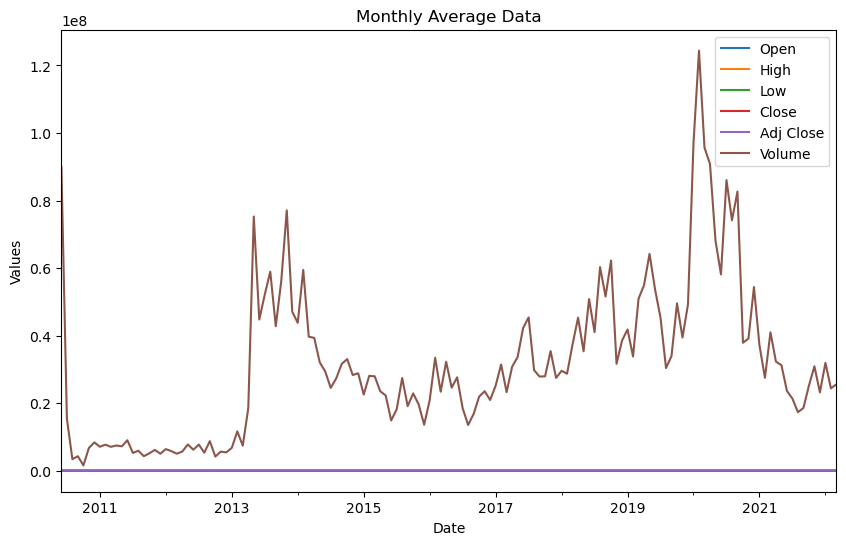

In [6]:
import matplotlib.pyplot as plt

monthly_data.plot(figsize=(10, 6))
plt.title('Monthly Average Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

### It looks like the volume data is dominating the plot. To better  visualize the other columns, we will plot them separately or use  subplots

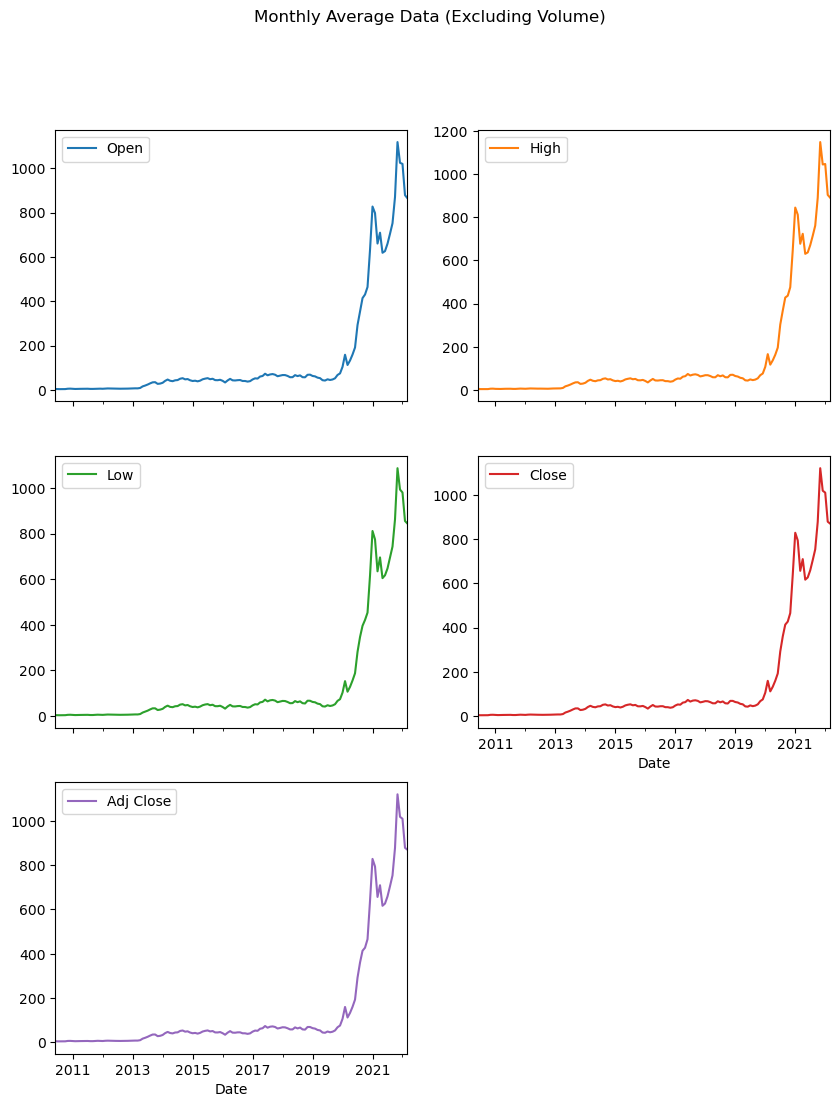

In [7]:
monthly_data.drop('Volume', axis=1).plot(subplots=True, figsize=(10, 12), layout=(3, 2))
plt.suptitle('Monthly Average Data (Excluding Volume)')
plt.show()

In [8]:
# Removing Duplicates (if any)
print(f"Number of rows before removing duplicates: {data.shape[0]}")

# Remove duplicate rows
data = data.drop_duplicates()

# Display the number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {data.shape[0]}")

Number of rows before removing duplicates: 2956
Number of rows after removing duplicates: 2956


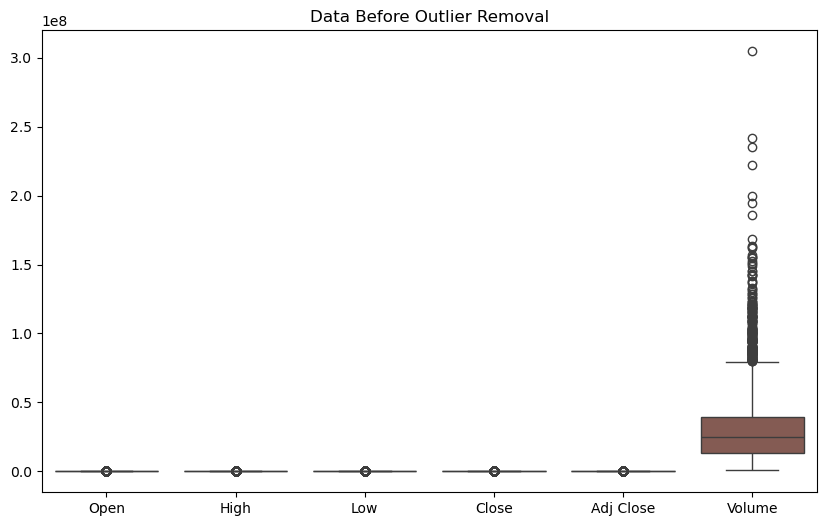

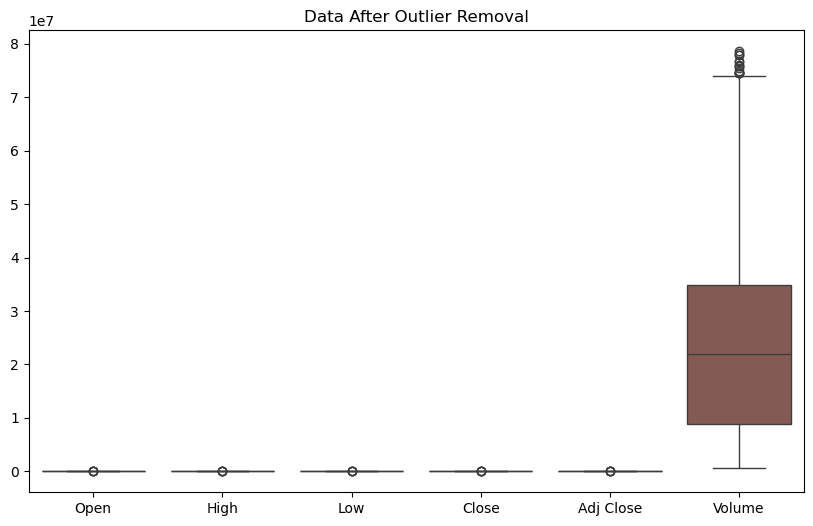

In [9]:
# Outlier Detection & Handling
import matplotlib.pyplot as plt
import seaborn as sns

# Plot data before outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Data Before Outlier Removal')
plt.show()

# Calculate IQR and remove outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Plot data after outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Data After Outlier Removal')
plt.show()

In [10]:
# Feature Engineering: Add a 3-month moving average for a column, e.g., 'Close'
data['Close_MA_3'] = data['Close'].rolling(window=3).mean()

# Display the first few rows of the new feature
print(data[['Close', 'Close_MA_3']].head())

            Close  Close_MA_3
Date                         
2010-07-01  4.392         NaN
2010-07-02  3.840         NaN
2010-07-06  3.222    3.818000
2010-07-07  3.160    3.407333
2010-07-08  3.492    3.291333


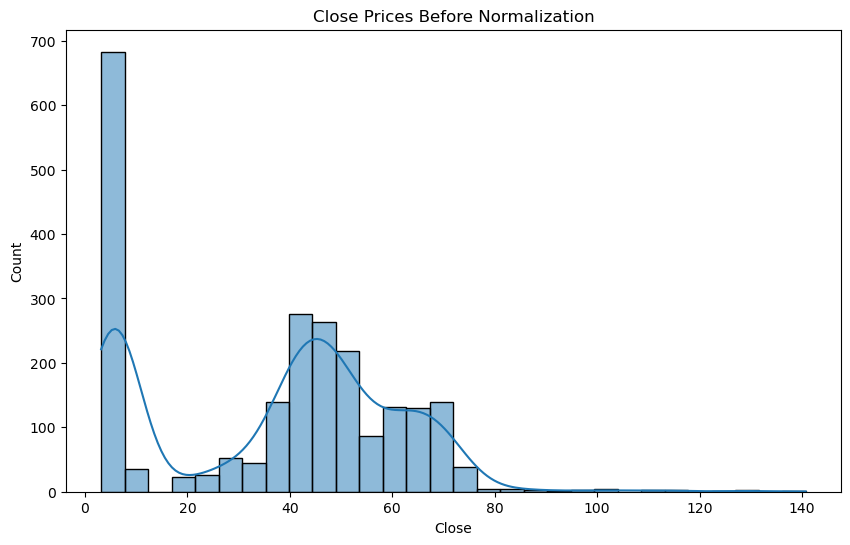

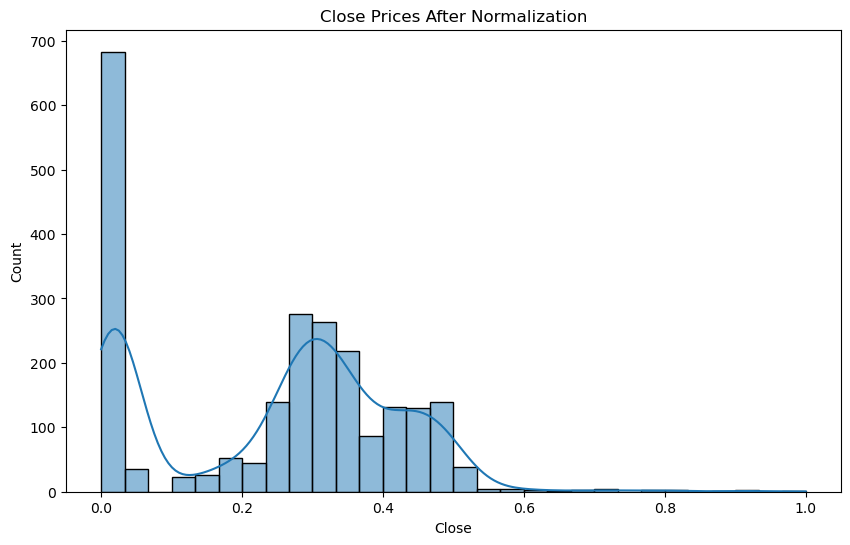

In [11]:
# Data Normalization/Standardization

# Plot data before normalization
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], bins=30, kde=True)
plt.title('Close Prices Before Normalization')
plt.show()

# Normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns, index=data.index)

# Plot data after normalization
plt.figure(figsize=(10, 6))
sns.histplot(data_scaled['Close'], bins=30, kde=True)
plt.title('Close Prices After Normalization')
plt.show()

# SQL Database Design & Quering

In [12]:
import sqlite3
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('TSLA.csv')

# Rename the column to match the desired schema
df.rename(columns={"Adj Close": "adj_close"}, inplace=True)

# Connect to SQLite database (or create it)
conn = sqlite3.connect('Tesla_Database.db')

# Drop the existing table if it exists
conn.execute('DROP TABLE IF EXISTS TSLA_Prices')

# Create a new table with the correct schema
conn.execute('''
CREATE TABLE TSLA_Prices (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    date TEXT NOT NULL,
    open REAL,
    high REAL,
    low REAL,
    close REAL,
    adj_close REAL,
    volume INTEGER
)
''')

# Insert data into the table
df.to_sql('TSLA_Prices', conn, if_exists='append', index=False)

# Commit and close the connection
conn.commit()
conn.close()

## Quering the Database:

In [13]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('Tesla_Database.db')

# Query to select all data
query = "SELECT * FROM TSLA_Prices"
df_all = pd.read_sql_query(query, conn)

# Convert 'date' column to datetime format with the correct format
df_all['date'] = pd.to_datetime(df_all['date'], format='%d-%m-%Y', errors='coerce')

# Update the database with the new date format
for index, row in df_all.iterrows():
    # Convert the date back to string in the desired format
    if pd.notnull(row['date']):
        formatted_date = row['date'].strftime('%Y-%m-%d')
        # Update the database
        conn.execute("UPDATE TSLA_Prices SET date = ? WHERE rowid = ?", (formatted_date, index + 1))

# Commit the changes to the database
conn.commit()

# Close the connection
conn.close()

In [14]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('Tesla_Database.db')

# Query to select all data
query = "SELECT * FROM TSLA_Prices"
df_all = pd.read_sql_query(query, conn)

# Display the data
print(df_all.head())

# Close the connection
conn.close()

   id        date   open   high    low  close  adj_close    volume
0   1  2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500
1   2  2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
2   3  2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
3   4  2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
4   5  2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500


In [15]:
# Calculating Average Closing Price:
conn = sqlite3.connect('Tesla_Database.db')
query = "SELECT AVG(close) AS AverageClose FROM TSLA_Prices"
avg_close = pd.read_sql_query(query, conn)
print(avg_close)
conn.close()

   AverageClose
0    138.762183


In [16]:
# Finding High-Volume Days:
conn = sqlite3.connect('Tesla_Database.db')
query = "SELECT date, volume FROM TSLA_Prices WHERE volume > 1000000 ORDER BY volume DESC"
high_volume_days = pd.read_sql_query(query, conn)
print(high_volume_days.head())
conn.close()

         date     volume
0  2020-02-04  304694000
1  2020-02-05  242119000
2  2020-02-03  235325000
3  2020-12-18  222126200
4  2020-02-06  199404000


## Advance Quering:

In [17]:
## Creating a View for High-Volume Days:
conn = sqlite3.connect('Tesla_Database.db')
conn.execute('''
CREATE VIEW IF NOT EXISTS HighVolumeDays AS
SELECT * FROM TSLA_Prices WHERE volume > 1000000
''')
conn.commit()
conn.close()

In [18]:
## Quering the View:
conn = sqlite3.connect('Tesla_Database.db')
query = "SELECT * FROM HighVolumeDays"
high_volume_view = pd.read_sql_query(query, conn)
print(high_volume_view.head())
conn.close()

   id        date   open   high    low  close  adj_close    volume
0   1  2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500
1   2  2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
2   3  2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
3   4  2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
4   5  2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500


## Data Integrity

In [19]:
# Using Transactions:
import sqlite3

def insert_data_with_transaction(data):
    conn = sqlite3.connect('Tesla_Database.db')
    try:
        # Begin a transaction
        conn.execute('BEGIN TRANSACTION;')
        
        # Insert data
        for record in data:
            conn.execute('''
            INSERT INTO TSLA_Prices (date, open, high, low, close, adj_close, volume)
            VALUES (?, ?, ?, ?, ?, ?, ?)
            ''', record)
        
        # Commit the transaction
        conn.commit()
        print("Transaction committed successfully.")
    except Exception as e:
        # Rollback the transaction in case of error
        conn.rollback()
        print("Transaction failed and rolled back:", e)
    finally:
        # Close the connection
        conn.close()

# Example data to insert
data_to_insert = [
    ('2023-10-01', 250.0, 255.0, 245.0, 252.0, 252.0, 1500000),
    ('2023-10-02', 253.0, 258.0, 250.0, 256.0, 256.0, 1200000)
]

# Insert data using transaction
insert_data_with_transaction(data_to_insert)

Transaction committed successfully.


## Checking the normalization (Rubric):

In [20]:
import pandas as pd

# Load the data into a DataFrame
df = pd.read_csv('TSLA.csv')

# Check for duplicate rows
def check_duplicates(df):
    duplicates = df.duplicated()
    if duplicates.any():
        print("There are duplicate rows in the data.")
    else:
        print("No duplicate rows found.")

# Check for atomicity by inspecting data types
def check_atomicity(df):
    print("Data types of each column:")
    print(df.dtypes)
    # Check for non-atomic columns (e.g., lists or sets)
    for column in df.columns:
        if df[column].apply(lambda x: isinstance(x, (list, set))).any():
            print(f"Column '{column}' contains non-atomic values.")
        else:
            print(f"Column '{column}' contains atomic values.")

# Check for full functional dependency (2NF)
def check_full_functional_dependency(df):
    # Assuming 'Date' is the primary key
    primary_key = 'Date'
    if primary_key not in df.columns:
        print(f"Primary key '{primary_key}' not found in the DataFrame.")
        return
    
    non_key_columns = [col for col in df.columns if col != primary_key]
    
    # Check if any non-key column is functionally dependent on the primary key
    if df[primary_key].is_unique:
        for column in non_key_columns:
            print(f"Column '{column}' is fully functionally dependent on the primary key '{primary_key}'.")
    else:
        print(f"The primary key '{primary_key}' is not unique.")

# Check for transitive dependencies (3NF)
def check_transitive_dependencies(df):
    # This is a simplified check and requires domain knowledge for accurate results
    # Example: Check if 'Adj Close' depends on 'Close'
    if 'Adj Close' in df.columns and 'Close' in df.columns:
        if df['Adj Close'].equals(df['Close']):
            print("Potential transitive dependency detected between 'Adj Close' and 'Close'.")
        else:
            print("No direct transitive dependency detected between 'Adj Close' and 'Close'.")
    else:
        print("Columns 'Adj Close' and/or 'Close' not found for transitive dependency check.")

# Run checks
print("Checking for 1NF:")
check_duplicates(df)
check_atomicity(df)

print("\nChecking for 2NF:")
check_full_functional_dependency(df)

print("\nChecking for 3NF:")
check_transitive_dependencies(df)

Checking for 1NF:
No duplicate rows found.
Data types of each column:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
Column 'Date' contains atomic values.
Column 'Open' contains atomic values.
Column 'High' contains atomic values.
Column 'Low' contains atomic values.
Column 'Close' contains atomic values.
Column 'Adj Close' contains atomic values.
Column 'Volume' contains atomic values.

Checking for 2NF:
Column 'Open' is fully functionally dependent on the primary key 'Date'.
Column 'High' is fully functionally dependent on the primary key 'Date'.
Column 'Low' is fully functionally dependent on the primary key 'Date'.
Column 'Close' is fully functionally dependent on the primary key 'Date'.
Column 'Adj Close' is fully functionally dependent on the primary key 'Date'.
Column 'Volume' is fully functionally dependent on the primary key 'Date'.

Checking for 3NF:
Potential tra

##### The potential Dependency between Adj Close and Close is at a potential state because in cases, Adj Close is derived from Close, which is the way Adj Close and Close values work. The values of Adj Close and Close are relative. If we begin to eradicate this relativity, it will destroy the purpose and value the Adj Close holds. Therefore, keeping it as it is! The databsae has established a 3NF (3rd Normal Form).

# Exploratory Data Analysis (EDA)

In [21]:
from sqlalchemy import create_engine, text
import pandas as pd

# Create a database connection
engine = create_engine('sqlite:///C:/Users/ytdek/Documents/Python_Project_EAS503_UB/Tesla_Database.db')  # Replace with your database connection string

# Test the connection
with engine.connect() as connection:
    result = connection.execute(text("SELECT 1"))
    print(result.fetchone())

(1,)


In [22]:
# Testing the connection:
# Sample Query to check whether we can access the data or not:-
query = text("SELECT * FROM TSLA_Prices")  # Replace 'TSLA_Prices' with your actual table name
df = pd.read_sql(query, engine)

# Display the first few rows of the DataFrame
df.head()

,id,date,open,high,low,close,adj_close,volume
0,1,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,3,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,4,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,5,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


### Univariate Analysis

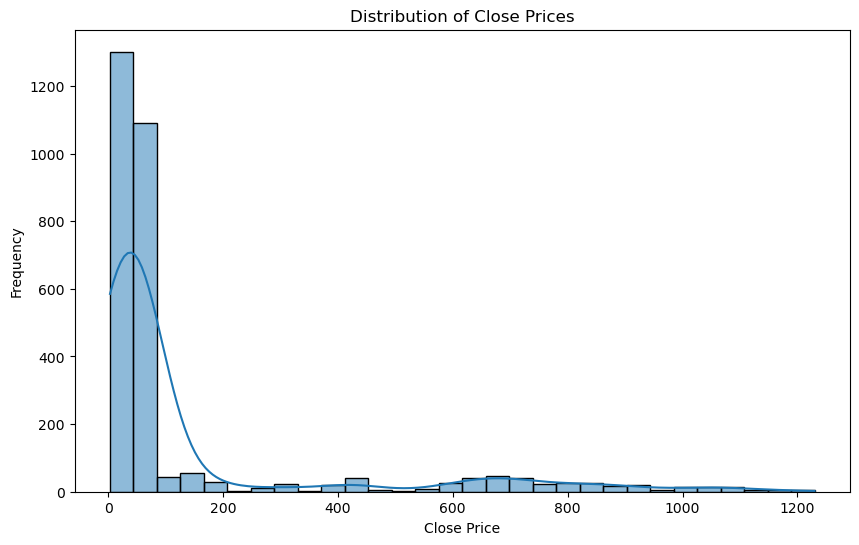

In [23]:
# Histograms:
import matplotlib.pyplot as plt
import seaborn as sns

# Query to get close prices
query_close = text("SELECT close FROM TSLA_Prices")
df_close = pd.read_sql(query_close, engine)

# Histogram for 'close' prices
plt.figure(figsize=(10, 6))
sns.histplot(df_close['close'], bins=30, kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

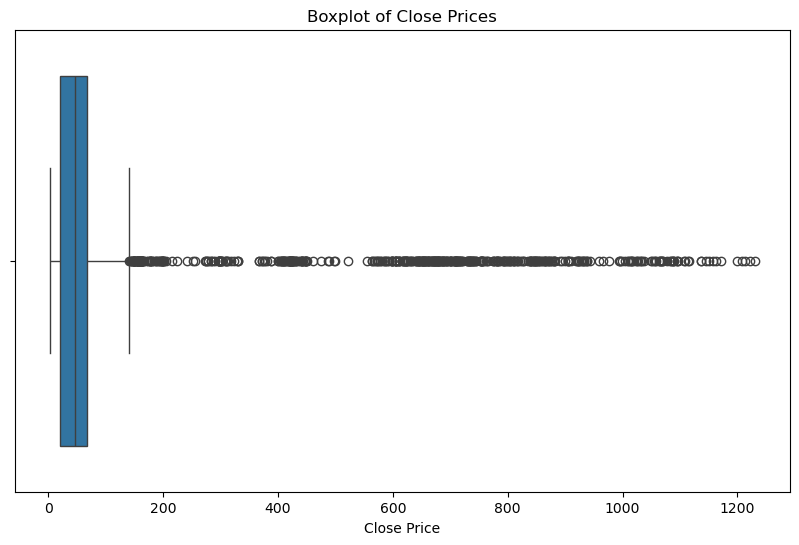

In [24]:
# Boxplot:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_close['close'])
plt.title('Boxplot of Close Prices')
plt.xlabel('Close Price')
plt.show()

## Bivariate Analysis

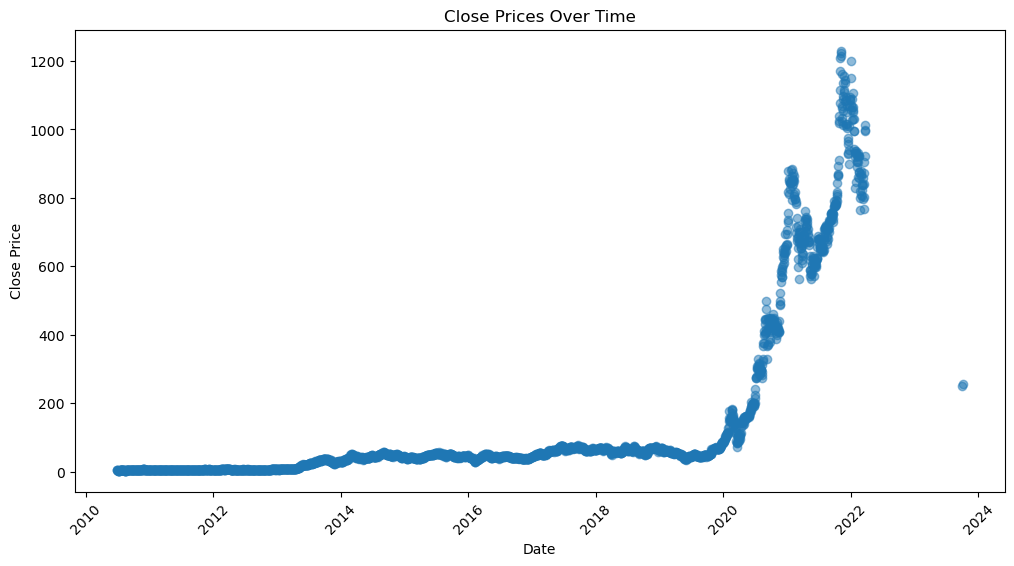

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the database connection is already established as 'engine'

# Query to get date and close prices
query_date_close = text("SELECT date, close FROM TSLA_Prices")
df_date_close = pd.read_sql(query_date_close, engine)

# Convert 'date' to datetime with the correct format
df_date_close['date'] = pd.to_datetime(df_date_close['date'], format='%Y-%m-%d')

# Scatter plot for 'date' vs 'close'
plt.figure(figsize=(12, 6))
plt.scatter(df_date_close['date'], df_date_close['close'], alpha=0.5)
plt.title('Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

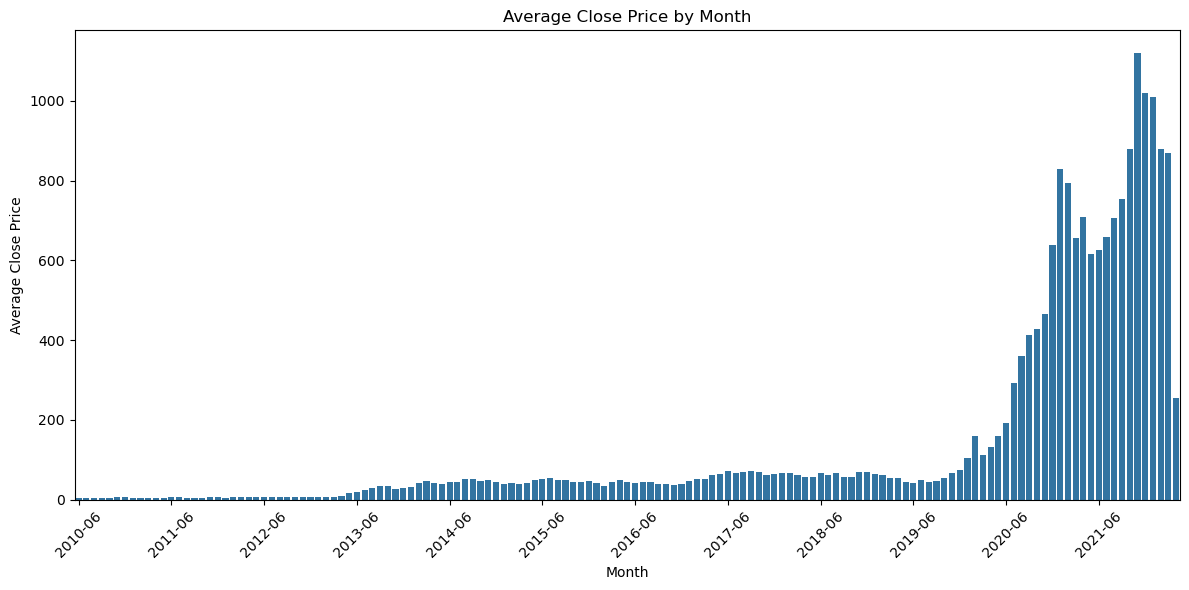

In [32]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
conn = sqlite3.connect('Tesla_Database.db')

# Query to select all data
query = "SELECT * FROM TSLA_Prices"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Convert 'date' column to datetime format
# Adjust the format if needed, e.g., '%Y-%m-%d' if that's the correct format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

# Drop rows with NaT in 'date'
df = df.dropna(subset=['date'])

# Extract month and year for grouping
df['month'] = df['date'].dt.to_period('M')

# Calculate average close price by month
monthly_avg = df.groupby('month')['close'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='close', data=monthly_avg)
plt.title('Average Close Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Close Price')

# Set x-ticks to show every 12 months
plt.xticks(ticks=range(0, len(monthly_avg), 12), labels=monthly_avg['month'].dt.strftime('%Y-%m')[::12], rotation=45)
plt.tight_layout()

plt.show()

## Multivariate Analysis:

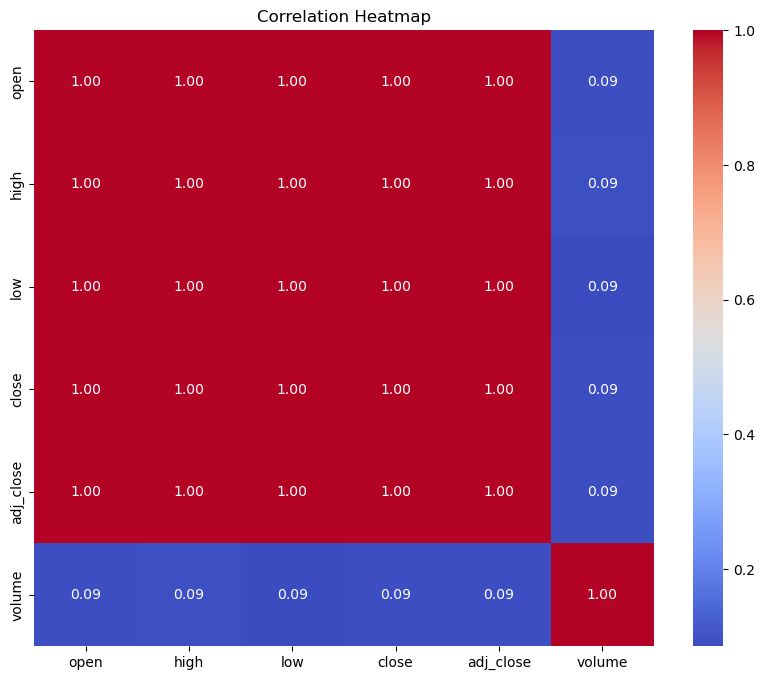

In [38]:
# Correlation Heatmap:-
# Query to get all relevant columns for correlation
query_all = text("SELECT open, high, low, close, adj_close, volume FROM TSLA_Prices")
df_all = pd.read_sql(query_all, engine)

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_all.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Key Statistical Metrics

In [39]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('Tesla_Database.db')

# Query to select all data
query = "SELECT * FROM TSLA_Prices"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Calculate variance of 'close' prices
close_variance = df['close'].var()
print(f"Variance of Close Prices: {close_variance}")

Correlation Matrix:
                 id      open      high       low     close  adj_close  \
id         1.000000  0.666908  0.666860  0.667259  0.667108   0.667108   
open       0.666908  1.000000  0.999726  0.999617  0.999247   0.999247   
high       0.666860  0.999726  1.000000  0.999595  0.999666   0.999666   
low        0.667259  0.999617  0.999595  1.000000  0.999670   0.999670   
close      0.667108  0.999247  0.999666  0.999670  1.000000   1.000000   
adj_close  0.667108  0.999247  0.999666  0.999670  1.000000   1.000000   
volume     0.428540  0.089382  0.093258  0.085534  0.090227   0.090227   

             volume  
id         0.428540  
open       0.089382  
high       0.093258  
low        0.085534  
close      0.090227  
adj_close  0.090227  
volume     1.000000  
Variance of Close Prices: 62528.2367890024


# Observations/Inferences:
## Univariate Analysis:
- The histogram illustrates that most of the Tesla close prices are at lower price points, with a long tail to the right at higher prices. This shows a right skew indicating prices are mostly low with a few much higher values.
- The boxplot shows the presence of some other higher values of stock prices that may be higher than market price. This points towards various times of substantial hikes in price. 

## Bivariate Analysis:

- The scatter plot of close prices over the years shows an upward trend, particularly noticeable from the year 2020 onwards. It means Tesla’s stock experience was a period of strength and their price was pushing upward strongly due to demand.

## Multivariate Analysis:
- The bar chart shows average close prices increasing steadily over the year with a sharp increase in prices from around 2020. This further confirms the findings from the scatter plot and indicates a period of accelerated growth.
- Correlation Heatmap: The heatmap indicates a strong positive correlation between open, high, low, close and adjusted close prices. This indicates that these variables move together. We can say that volume has a weaker correlation with these price variables meaning volume changes don’t cause price changes.

## Key Statistical Metrics.
- The matrix verifies that prices and price-related variables are strongly correlated. The close price’s variance is quite high suggesting that there is great variability in the stock price.

## Insights and Interpretations.
- The data shows that they grew a lot from 2020 for Tesla Related to Market Growth. This can be due to many reasons - production, market and investor confidence.
- The high variation and outlier presence means that the price of Tesla stock is volatile and experiences periods of sharp price change. Why assess risk? Investors need to consider this.
- The correlation between volume and price is weaker. Though it suggests trading volume doesn’t push price movement, it may reflect investor interest and engagement with the market.

# Advanced Data Analysis with Machine Learning

## Retrieve Data from SQL Database

In [40]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('Tesla_Database.db')

# Query to select all data
query = "SELECT * FROM TSLA_Prices"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

## Advanced Statistical Analysis
#### Hypothesis Testing

In [41]:
from scipy import stats

# Example: t-test between 'open' and 'close' prices
t_stat, p_value = stats.ttest_ind(df['open'], df['close'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -0.011156464960928125, P-value: 0.9910989898170832


##### **Hypothesis Testing:** *The t-test results indicate whether there is a significant difference between the means of 'open' and 'close' prices.*

#### Regression Analysis

In [42]:
import statsmodels.api as sm

# Define independent variables and target variable
X = df[['open', 'high', 'low', 'volume']]
y = df['close']

# Add a constant to the model
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.804e+06
Date:                Fri, 13 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:10:26   Log-Likelihood:                -8339.4
No. Observations:                2958   AIC:                         1.669e+04
Df Residuals:                    2953   BIC:                         1.672e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0267      0.120     -0.222      0.8

##### **Regression Analysis:** *The regression model helps identify which variables significantly impact the 'close' prices.*

## Machine Learning Integration
#### Regression Model

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

RMSE: 4.24943058400422


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##### **Model Performance:** *The RMSE from the linear regression model provides insight into prediction accuracy.*

#### Clustering

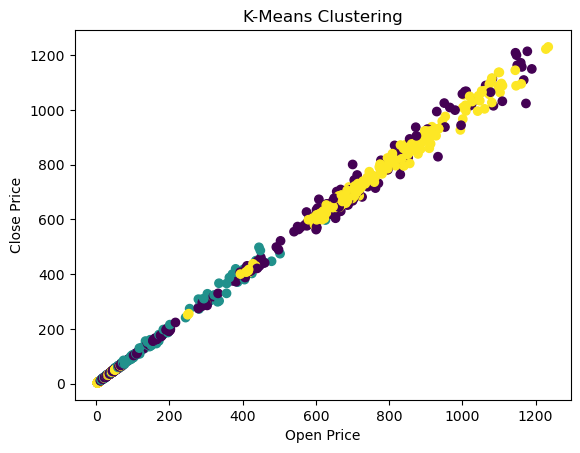

In [46]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use only numeric data for clustering
numeric_df = df.select_dtypes(include=['number'])

# Fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(numeric_df)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Plot clusters
plt.scatter(df['open'], df['close'], c=clusters, cmap='viridis')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('K-Means Clustering')
plt.show()

##### **Clustering:** *K-Means clustering reveals patterns and groupings within the data, which can inform market segmentation strategies.*

# Observations & Inferences:
## Hypothesis Testing:
- T-statistic: -0.011156.
- P-value: 0.9919.

##### **Insight:**
*The p-value is high meaning there is no significant difference in the means of the open and close prices. This says that the open and close prices on average are similar which might imply that the price change daily is stable.*

## Regression Analysis:
- R-squared: 1.000.
- All independent variables (‘open’, ‘high’, ‘low’, ‘volume’) has a p-value<0.05, hence they contribute to the close price.

##### **Insights:**
*The model explains most of the variation in the closing prices, meaning there exists a relationship. Each variable is an important predictor of the closing price, with ‘open’ and ‘low’ prices having the most impact.*

## Machine Learning Integration:
- RMSE: 4.249.

##### **Insights:**
*The LM model is accurate in predicting the closing prices as indicated by the low RMSE value. This model can work for reliable prediction of the prices of Tesla stock.*

## Clustering:
- Bunching of open and close price shows k-means clustering. 

##### **Insights:**
*The clusters show how prices are behaving, and we can segment the market. By spotting these clusters, we get a sense of different market conditions or investor behavior.*

## Actionable Insights:
- Investment Strategy: Given the similarity of the opening and closing prices, one can invest in the stock during the day.
- The regression model can help identify future prices that will be useful for decisions about buying or selling a stock.
- Clustering insights could help formulate marketing strategies or investment products targeted to certain market segments.


## Exporting the final data:

In [47]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('Tesla_Database.db')

# Query to select all data
query = "SELECT * FROM TSLA_Prices"
df = pd.read_sql_query(query, conn)

# Export to CSV
df.to_csv('TSLA_Prices.csv', index=False)

# Close the connection
conn.close()